## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [1]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. About Dataset

In [2]:
file_path   = r'Resume_New/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [3]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [4]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


### 2.1 Type of File Format

In [5]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

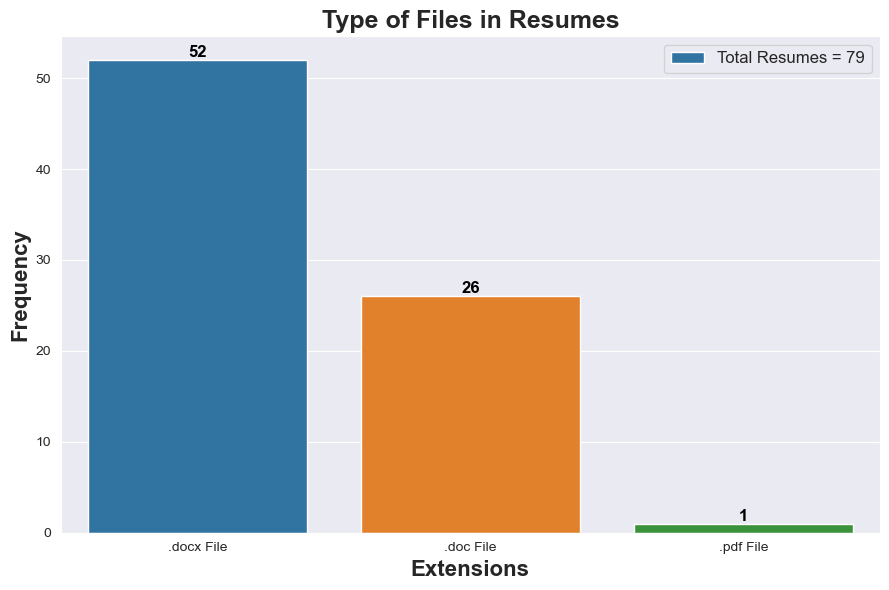

In [6]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

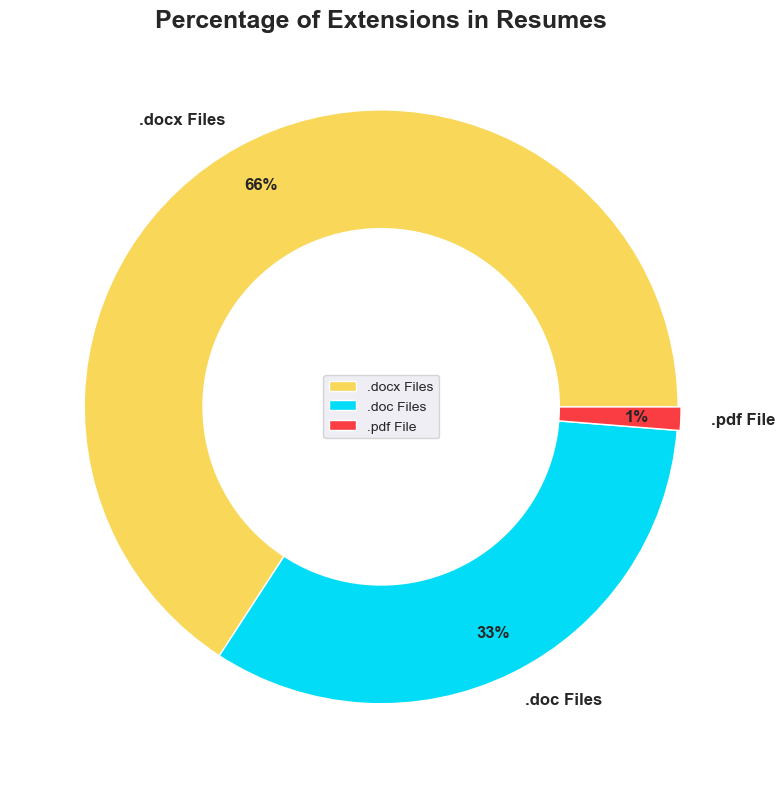

In [7]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

## 3. Extract Resumes by Profile Category

In [8]:
file_path = r'Resume_New/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [9]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Internship,Internship Ravali_Musquare.docx
1,Internship,Internship Susovan Bag_Musquare.docx
2,PeopleSoft Admin,Peoplesoft Admin_AnubhavSingh.docx
3,PeopleSoft Admin,Peoplesoft Admin_G Ananda Rayudu.doc
4,PeopleSoft Admin,Peoplesoft Admin_Gangareddy.doc
...,...,...
74,Workday HCM,Sri Krishna S_Hexaware.doc
75,Workday HCM,Srikanth-Hexaware.docx
76,Workday HCM,SSKumar_Hexaware.docx
77,Workday HCM,Venkateswarlu B_Hexaware.doc


In [10]:
resume_data.Profile.value_counts().index

Index(['Workday HCM', 'SQL Developer', 'React Developer', 'React JS Developer',
       'PeopleSoft Admin', 'PeopleSoft FSCM', 'PeopleSoft Finance',
       'Internship', 'PeopleSoft BDA'],
      dtype='object')

In [11]:
resume_data.Profile.value_counts()

Workday HCM           21
SQL Developer         14
React Developer       11
React JS Developer    11
PeopleSoft Admin       9
PeopleSoft FSCM        6
PeopleSoft Finance     3
Internship             2
PeopleSoft BDA         2
Name: Profile, dtype: int64

### 3.1 Number of Total Resumes

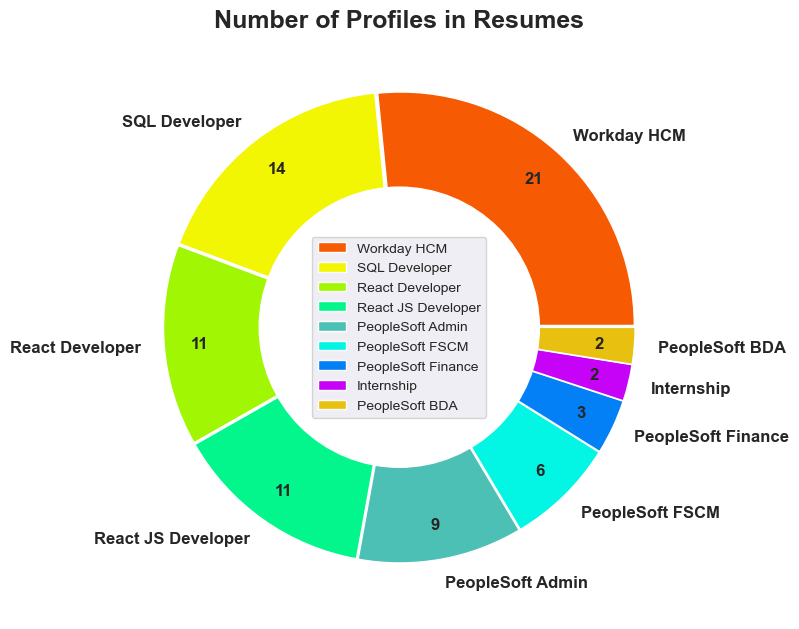

In [12]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Pai', dpi = 500)

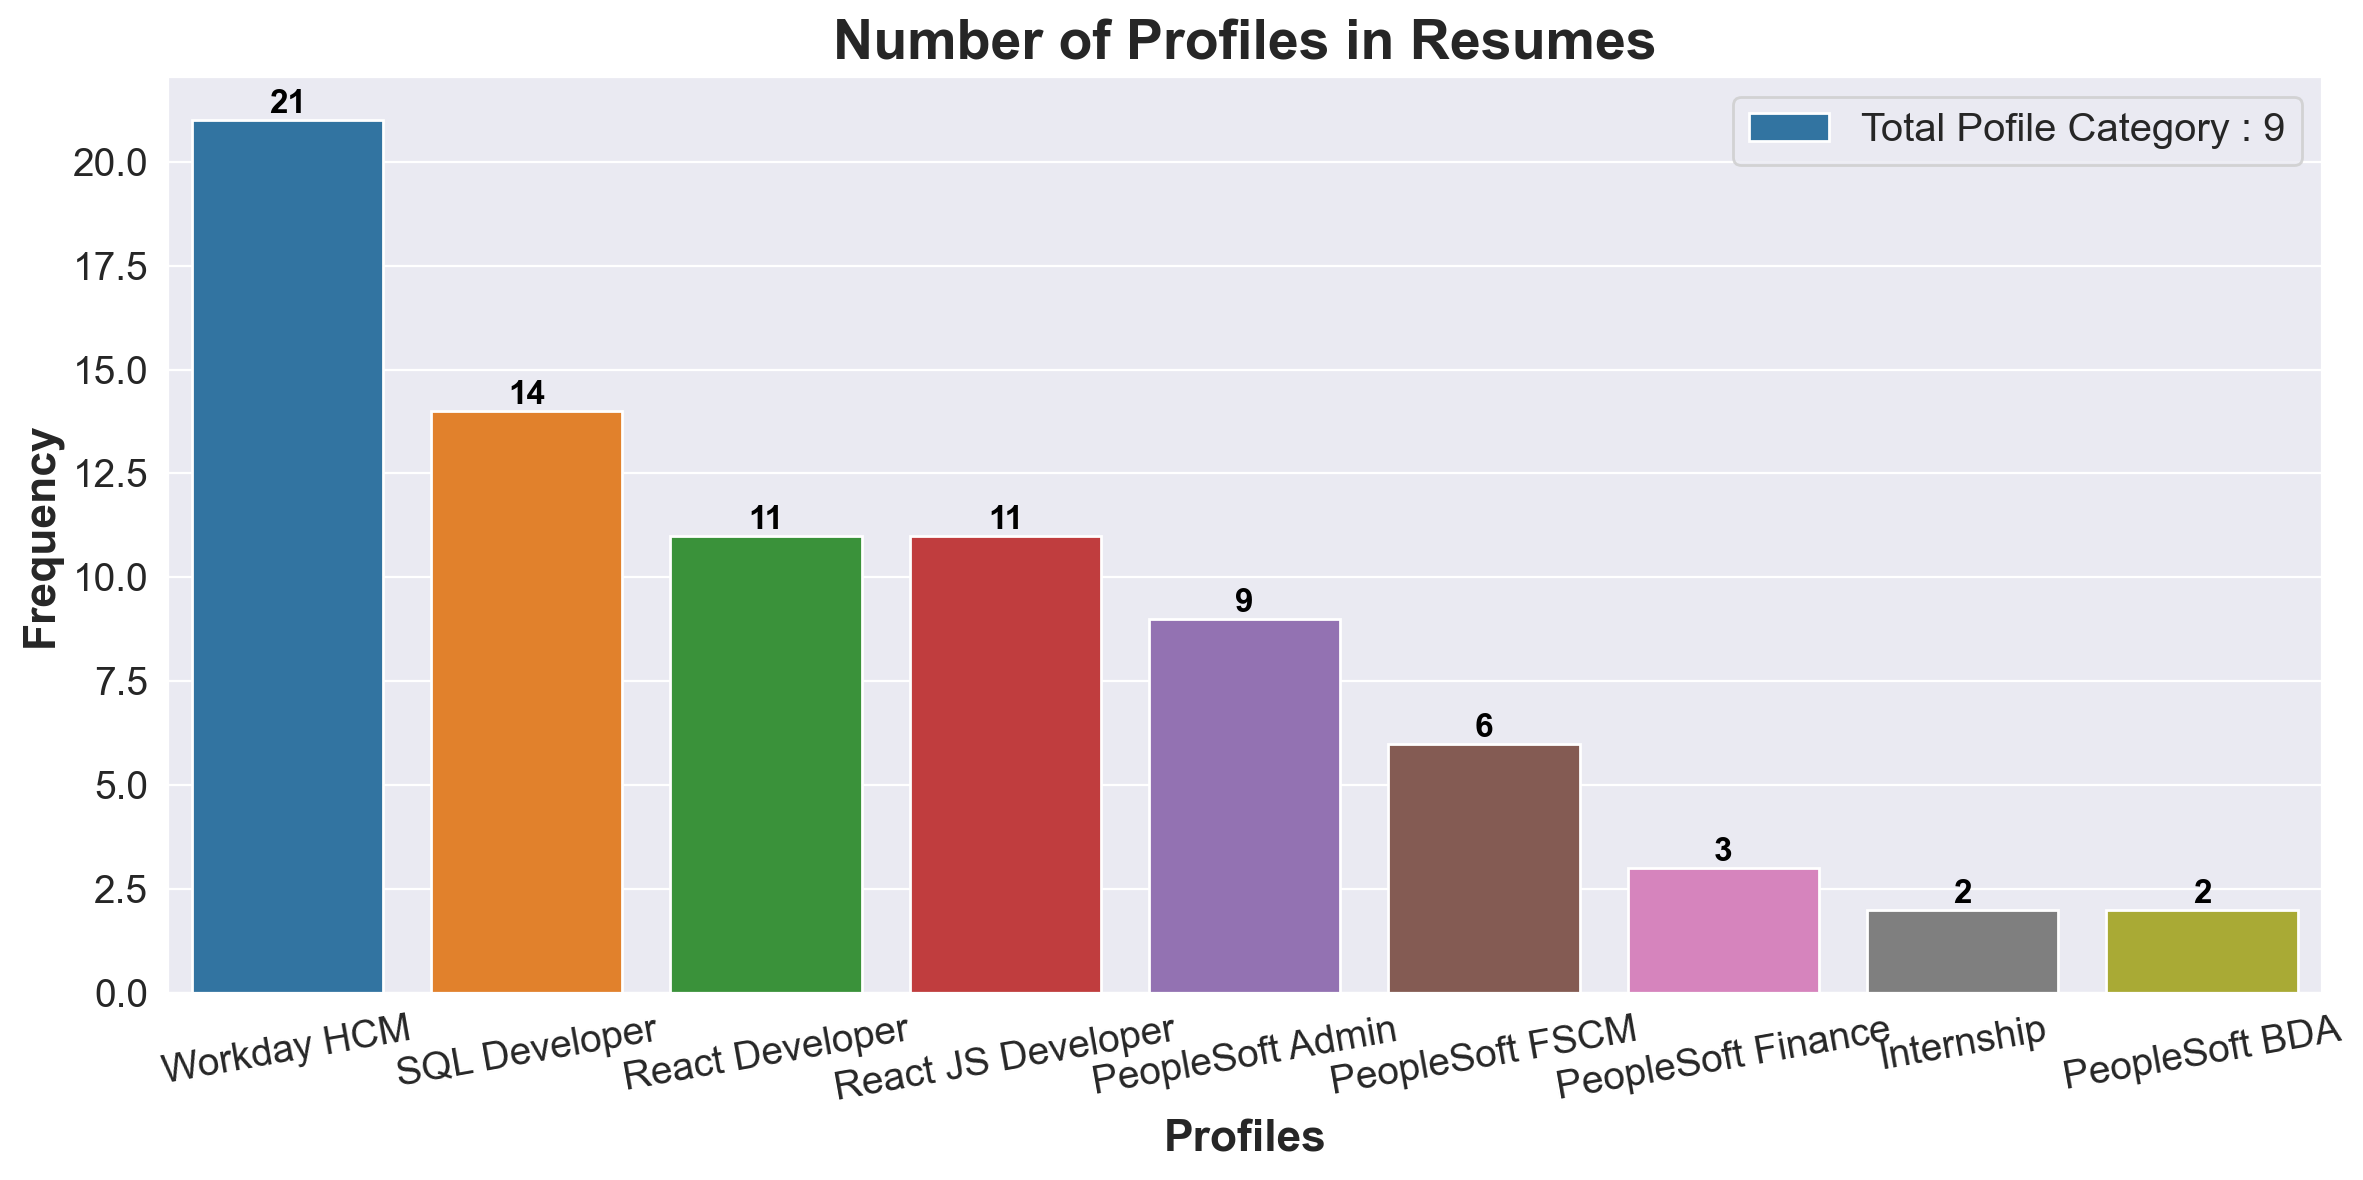

In [13]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), data= resume_data,
                 ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Bar', dpi = 500)

### Percentage of Profiles Category

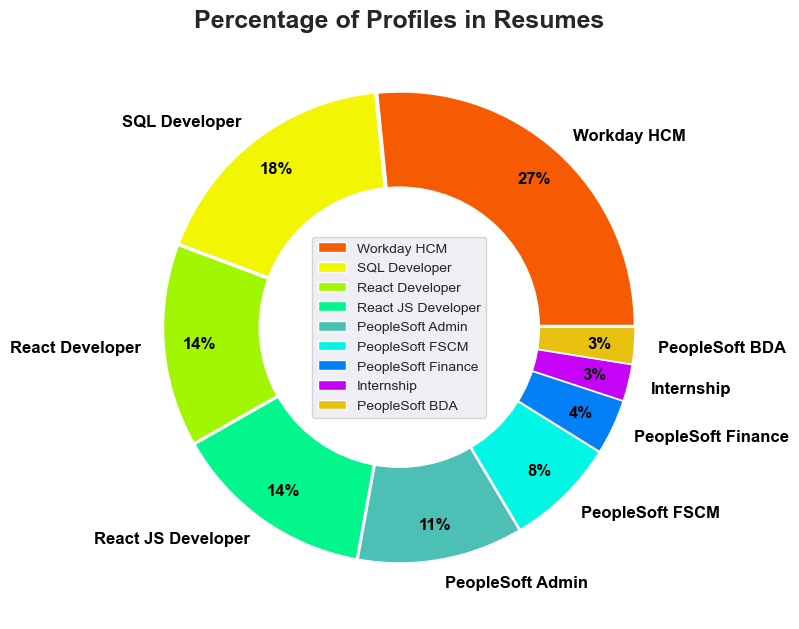

In [14]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'rotation':'0', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

## 4. Reading a Resume File

In [16]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('Resume_New\React Developer\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

## 5. Data Exploration

In [17]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Clean_Text
0,Internship,name ravali curriculum vitae specialization co...
1,Internship,susovan bag seeking challenging position field...
2,Peoplesoft Admin,anubhav kumar singh work globally competitive ...
3,Peoplesoft Admin,ananda rayudu profile summary years experience...
4,Peoplesoft Admin,peoplesoft database administrator gangareddy p...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


### 5.1 N-grams
* **N-grams analyses are often used to see which words often show up together.**

In [18]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(1)[:20]

[WordList(['susovan']),
 WordList(['bag']),
 WordList(['seeking']),
 WordList(['challenging']),
 WordList(['position']),
 WordList(['field']),
 WordList(['science']),
 WordList(['technology']),
 WordList(['utilize']),
 WordList(['skills']),
 WordList(['organization']),
 WordList(['individual']),
 WordList(['growth']),
 WordList(['enhance']),
 WordList(['knowledge']),
 WordList(['academic']),
 WordList(['learning']),
 WordList(['give']),
 WordList(['best']),
 WordList(['organization'])]

In [19]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(2)[:20]

[WordList(['susovan', 'bag']),
 WordList(['bag', 'seeking']),
 WordList(['seeking', 'challenging']),
 WordList(['challenging', 'position']),
 WordList(['position', 'field']),
 WordList(['field', 'science']),
 WordList(['science', 'technology']),
 WordList(['technology', 'utilize']),
 WordList(['utilize', 'skills']),
 WordList(['skills', 'organization']),
 WordList(['organization', 'individual']),
 WordList(['individual', 'growth']),
 WordList(['growth', 'enhance']),
 WordList(['enhance', 'knowledge']),
 WordList(['knowledge', 'academic']),
 WordList(['academic', 'learning']),
 WordList(['learning', 'give']),
 WordList(['give', 'best']),
 WordList(['best', 'organization']),
 WordList(['organization', 'skills'])]

In [20]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(3)[:20]

[WordList(['susovan', 'bag', 'seeking']),
 WordList(['bag', 'seeking', 'challenging']),
 WordList(['seeking', 'challenging', 'position']),
 WordList(['challenging', 'position', 'field']),
 WordList(['position', 'field', 'science']),
 WordList(['field', 'science', 'technology']),
 WordList(['science', 'technology', 'utilize']),
 WordList(['technology', 'utilize', 'skills']),
 WordList(['utilize', 'skills', 'organization']),
 WordList(['skills', 'organization', 'individual']),
 WordList(['organization', 'individual', 'growth']),
 WordList(['individual', 'growth', 'enhance']),
 WordList(['growth', 'enhance', 'knowledge']),
 WordList(['enhance', 'knowledge', 'academic']),
 WordList(['knowledge', 'academic', 'learning']),
 WordList(['academic', 'learning', 'give']),
 WordList(['learning', 'give', 'best']),
 WordList(['give', 'best', 'organization']),
 WordList(['best', 'organization', 'skills']),
 WordList(['organization', 'skills', 'ccna'])]

In [21]:
resume_data['Clean_Text']

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     anubhav kumar singh work globally competitive ...
3     ananda rayudu profile summary years experience...
4     peoplesoft database administrator gangareddy p...
                            ...                        
74    workday integration consultant name sri krishn...
75    seeking suitable positions workday hcm techno ...
76    workday hcm fcm name role kumar workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Clean_Text, Length: 79, dtype: object

### 5.2 Top 20 most used words in Resumes
* **Using CountVectorizer**

In [22]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Clean_Text']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [23]:
df_ngram

,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
...,...,...
25765,1,abilities skills
25766,1,abilities problem
25767,1,abilities july
25768,1,abilities good


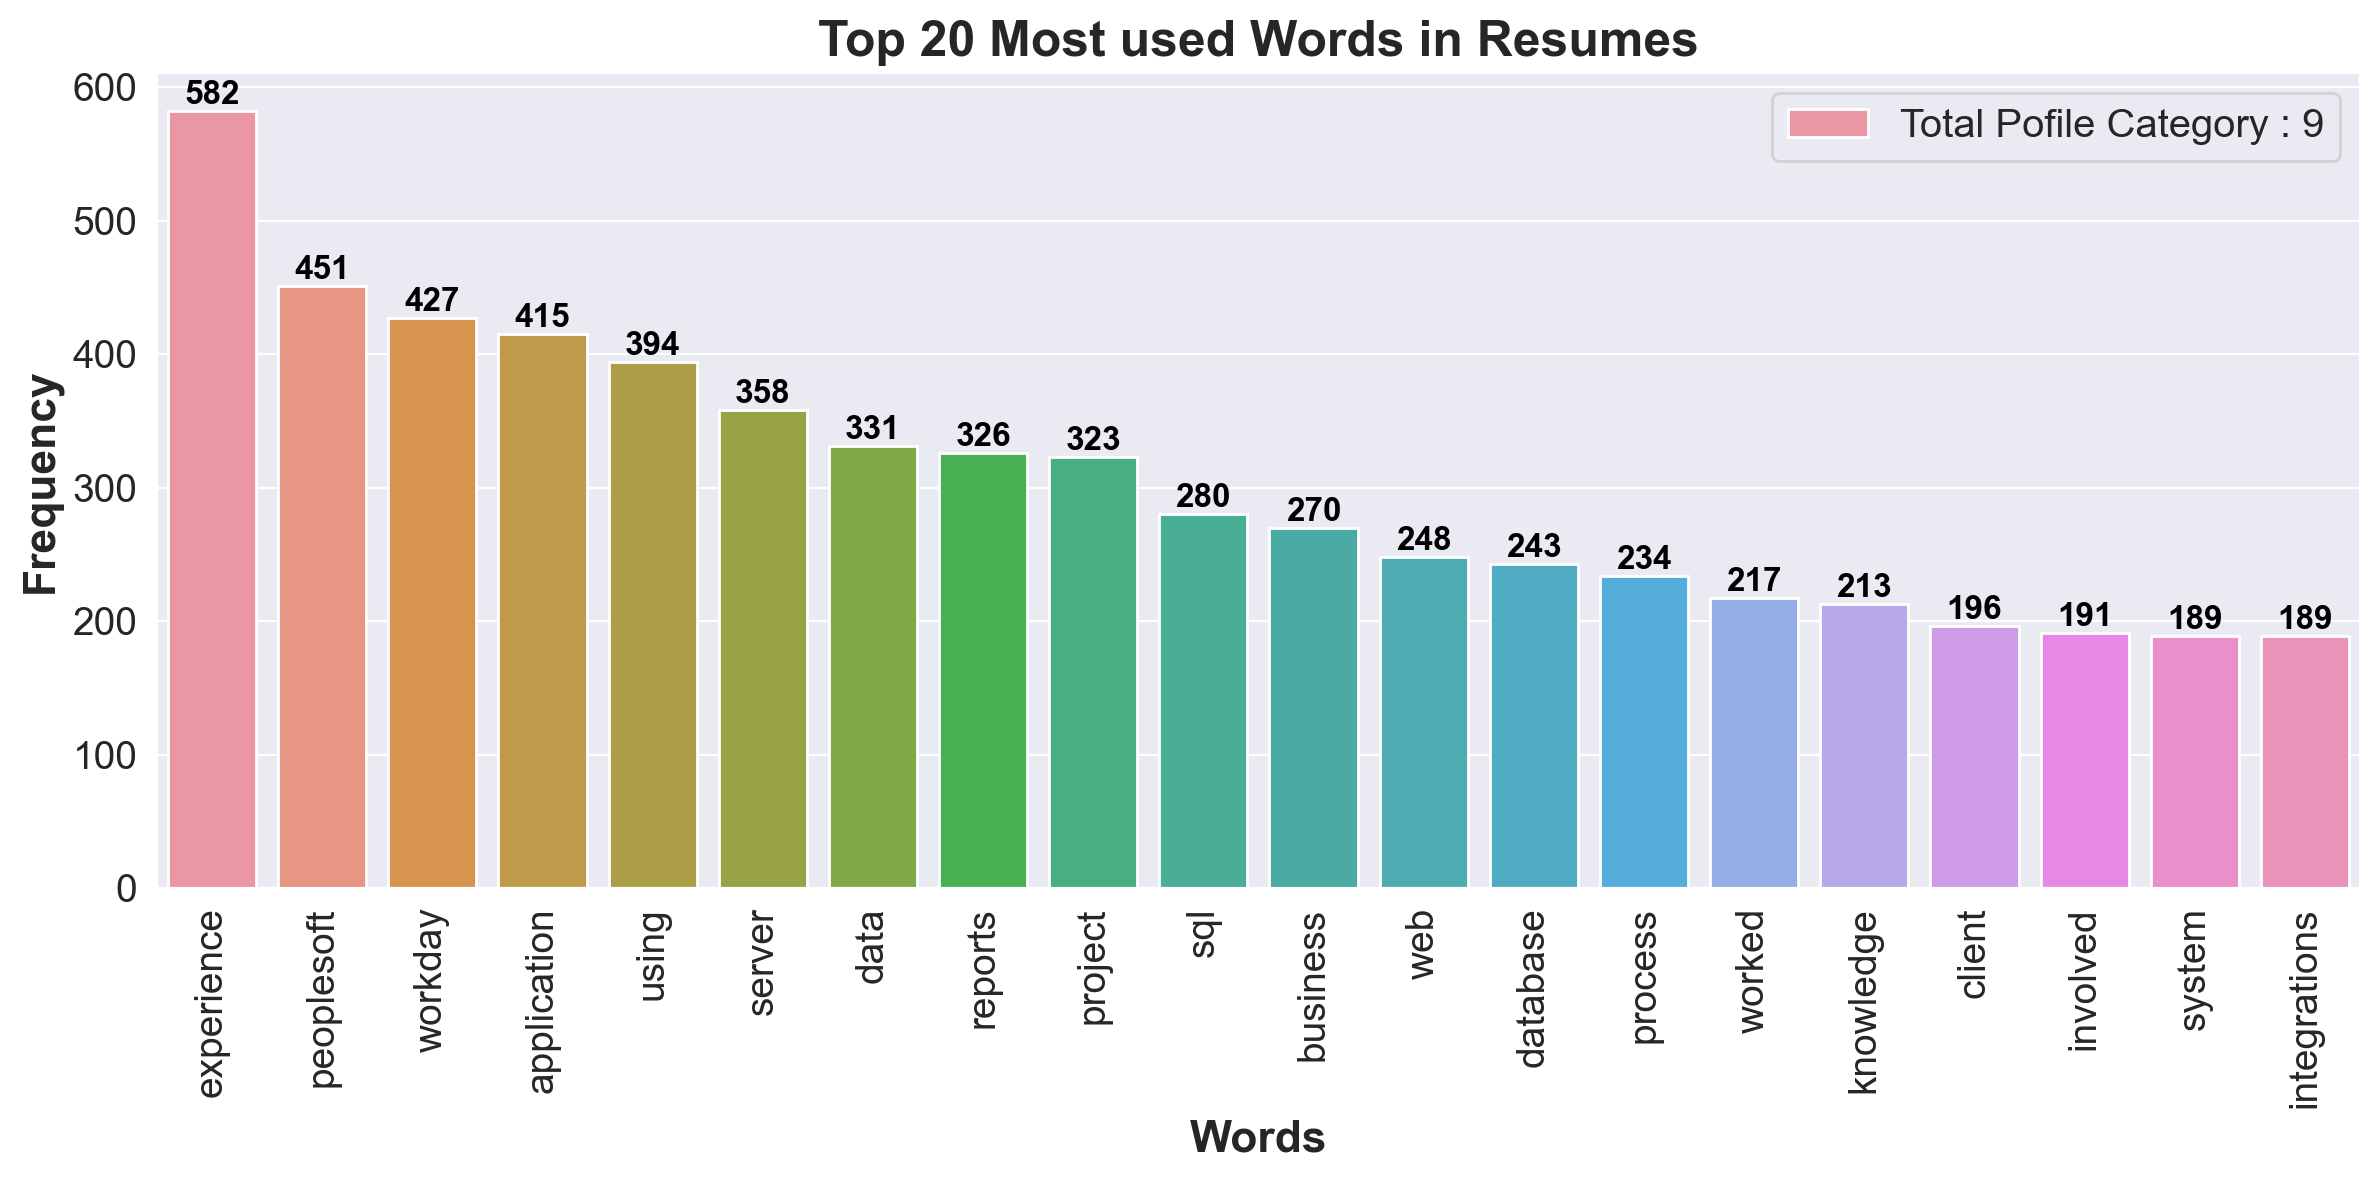

In [24]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar', dpi = 500)

### 5.4 Using the Word Clowds

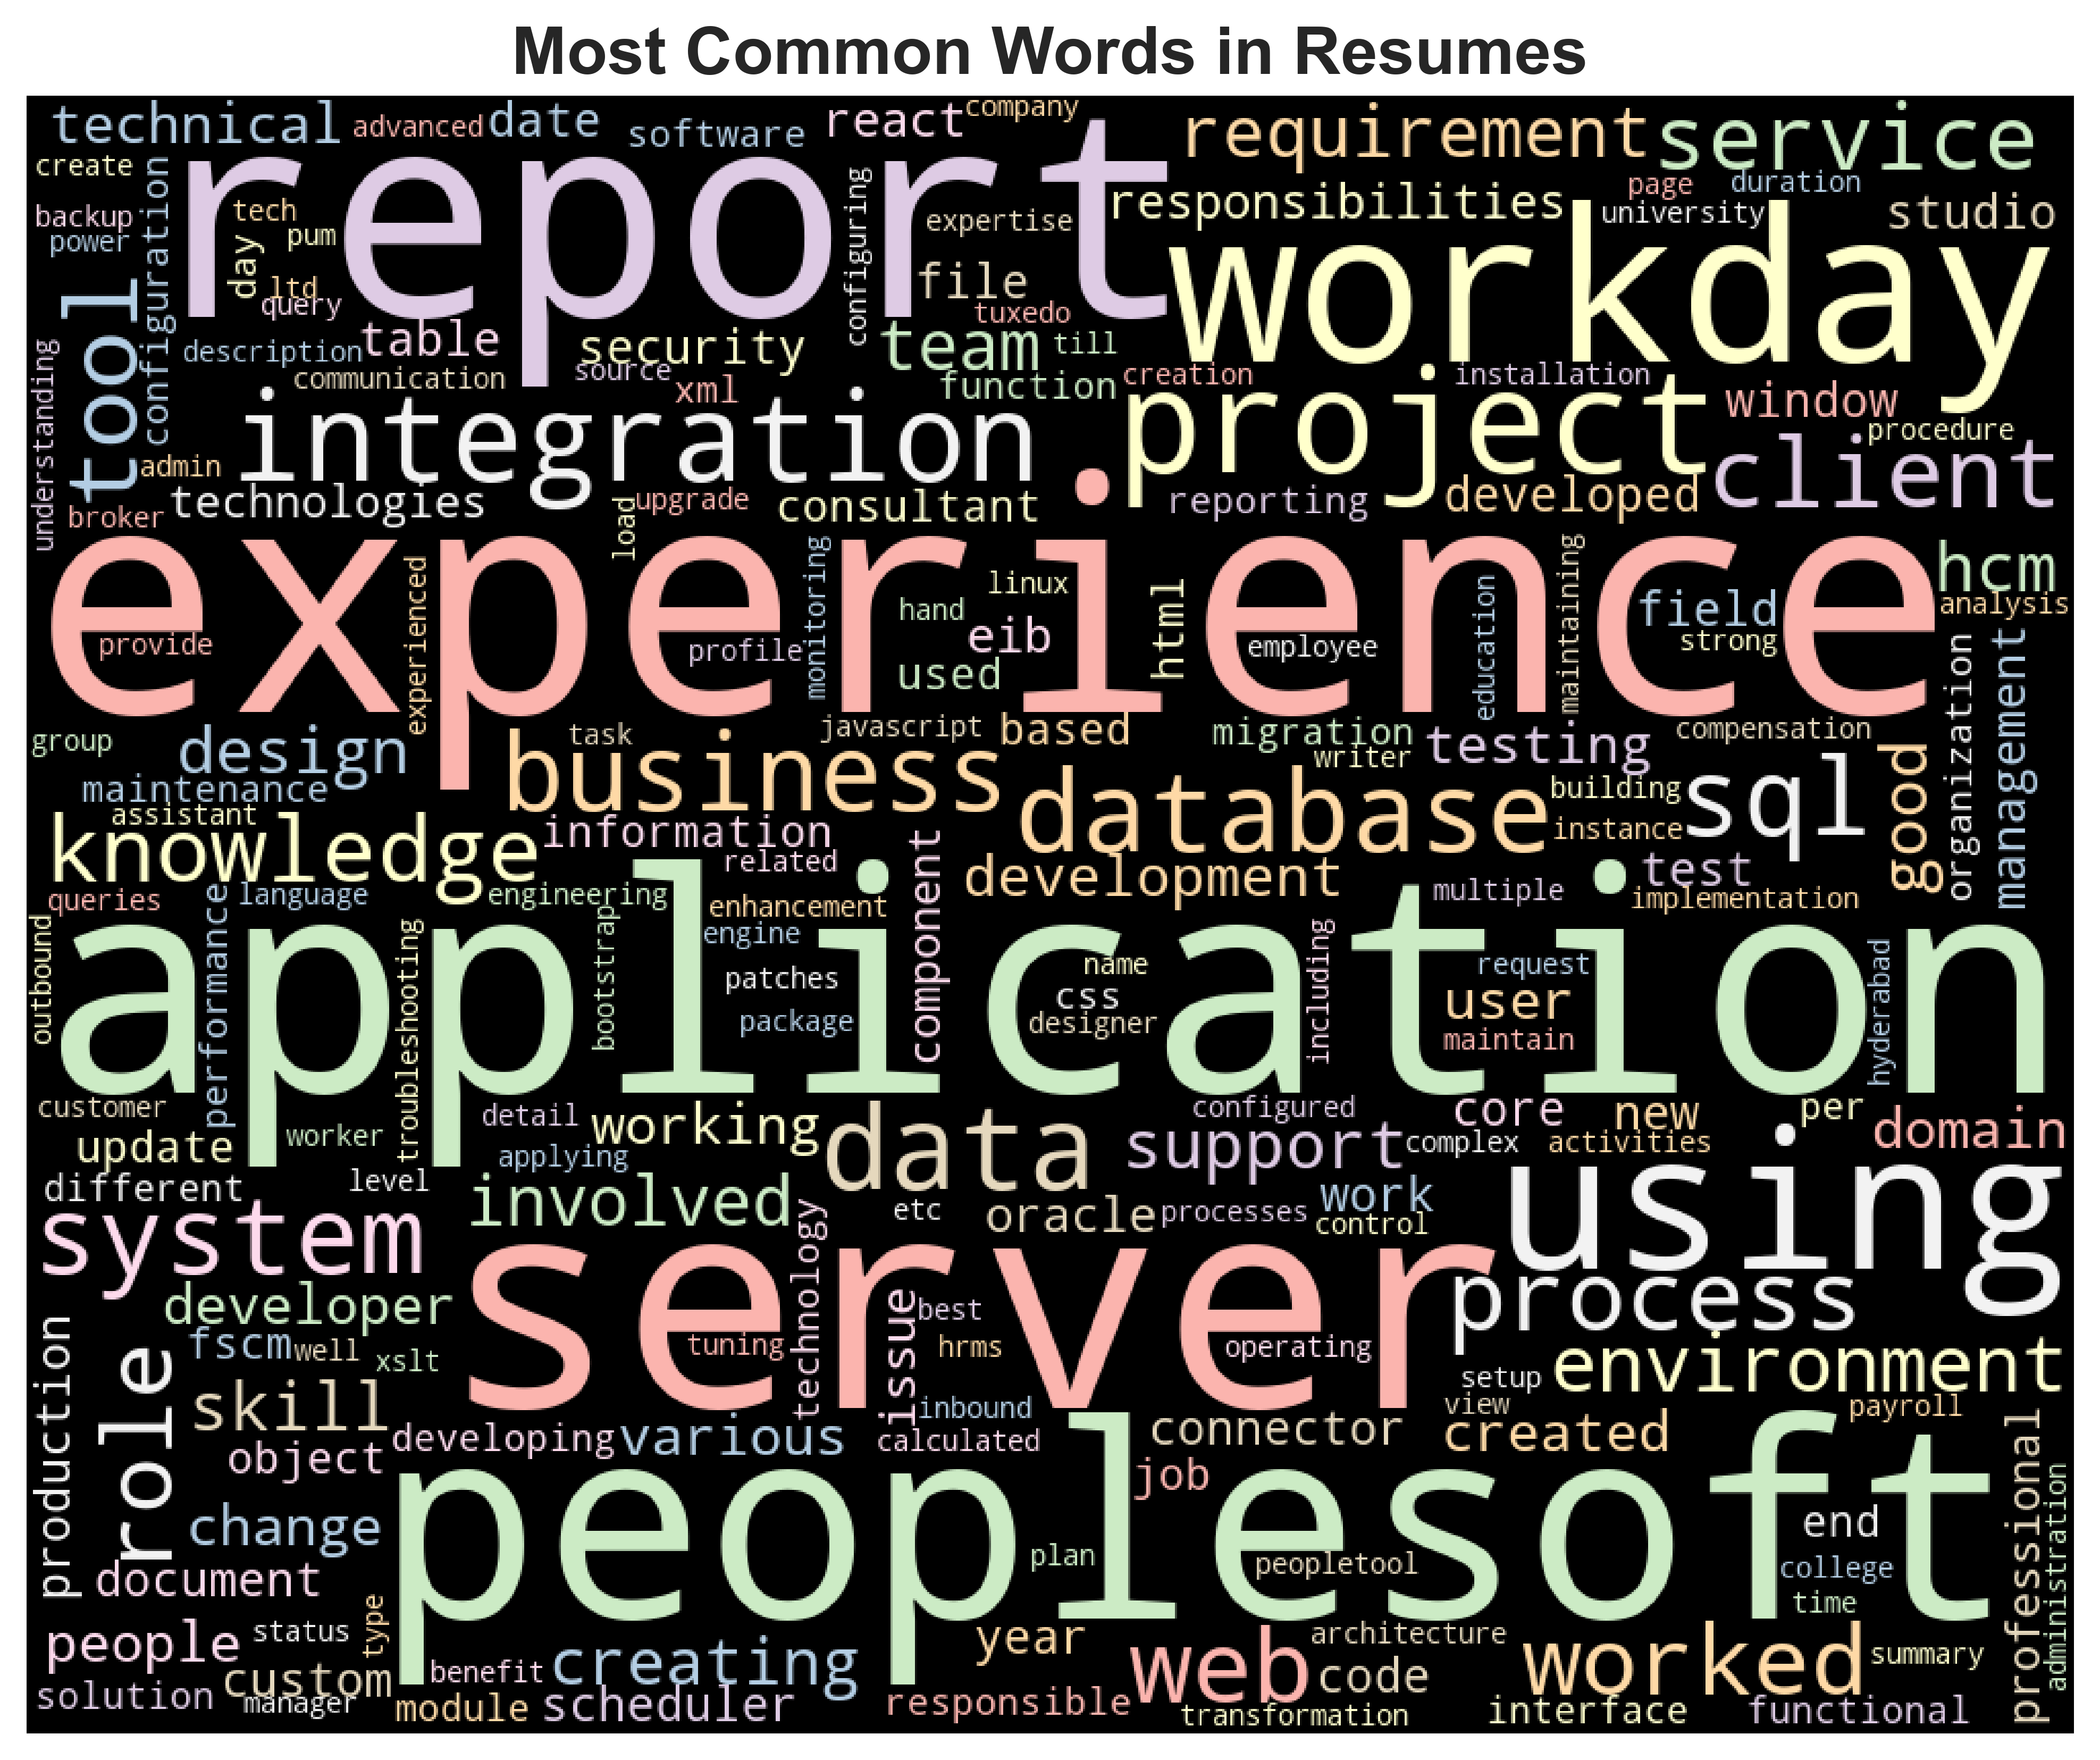

In [25]:
text = " ".join(cat for cat in resume_data.Clean_Text) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()

# THE END !!